In [2]:
pip install ann_visualizer

  Preparing metadata (setup.py) ... done
  Created wheel for ann_visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4168 sha256=8ce0ac74915c54b14cd42e680b4aae0b29056096db9fea2860260e9914d91166
  Stored in directory: /root/.cache/pip/wheels/6e/0f/ae/f5dba91db71b1b32bf03d0ad18c32e86126093aba5ec6b6488
Successfully built ann_visualizer


In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from ann_visualizer.visualize import ann_viz
import matplotlib.pyplot as plt
from sklearn import datasets
from keras.utils import to_categorical

In [7]:
#Load the Iris dataset from scikit-learn
iris=datasets.load_iris()
X=iris.data
y=iris.target

In [8]:
#One-hot encode the target lables
y=to_categorical(y,num_classes=3)

In [9]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [10]:
#Standardize the features
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [11]:
#Create a Neural Network Model

model=Sequential()


In [12]:
#Add input layer and hidden layers
model.add(Dense(units=64, activation='relu',input_dim=X_train.shape[1]))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))

In [13]:
#Add output layer(3 units for the 3 classes in Iris dataset)
model.add(Dense(units=3, activation='softmax'))

In [14]:
#Compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [15]:
#Train the Model
history=model.fit(X_train,y_train,epochs=50,batch_size=8,validation_data=(X_test,y_test))

Epoch 1/50
15/15 [==============================] - 1s 33ms/step - loss: 1.0667 - accuracy: 0.3250 - val_loss: 0.9998 - val_accuracy: 0.3667
Epoch 2/50
15/15 [==============================] - 0s 6ms/step - loss: 0.9723 - accuracy: 0.3583 - val_loss: 0.8936 - val_accuracy: 0.4000
Epoch 3/50
15/15 [==============================] - 0s 7ms/step - loss: 0.8763 - accuracy: 0.5000 - val_loss: 0.7733 - val_accuracy: 0.8000
Epoch 4/50
15/15 [==============================] - 0s 8ms/step - loss: 0.7596 - accuracy: 0.8167 - val_loss: 0.6467 - val_accuracy: 0.8667
Epoch 5/50
15/15 [==============================] - 0s 10ms/step - loss: 0.6164 - accuracy: 0.8583 - val_loss: 0.4848 - val_accuracy: 0.9333
Epoch 6/50
15/15 [==============================] - 0s 8ms/step - loss: 0.4539 - accuracy: 0.9167 - val_loss: 0.3362 - val_accuracy: 0.9667
Epoch 7/50
15/15 [==============================] - 0s 6ms/step - loss: 0.3382 - accuracy: 0.9250 - val_loss: 0.2366 - val_accuracy: 0.9333
Epoch 8/50
15/15 [

In [16]:
plt.figure(figsize=(12,6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

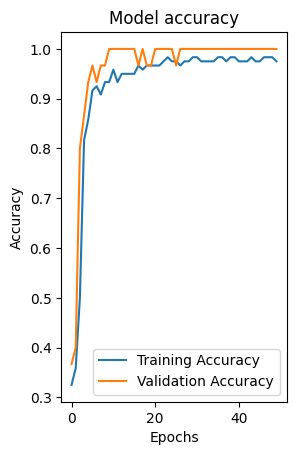

In [17]:
#Plot training &validation accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

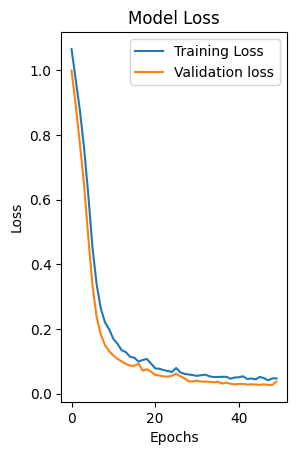

In [18]:
#Plot training & validation loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()